In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates = []
prices = []
dic_val = {}
act_price = {}
stocks_recommend_linear = {}
stocks_recommend_RBF = {}
final_recommend_linear = {}
final_recommend_RBF = {}

In [2]:
# Declaring dictionary for reading the stocks for data files of the required companies
dic_name = {}

dic_name["AAPL"] = "AAPL.csv"
dic_name["AMZN"] = "AMZN.csv"
dic_name["AXP"] = "AXP.csv"
dic_name["BABA"] = "BABA.csv"
dic_name["BOJA"] = "BOJA.csv"
dic_name["CHUY"] = "CHUY.csv"
dic_name["COP"] = "COP.csv"
dic_name["CSCO"] = "CSCO.csv"
dic_name["DFRG"] = "DFRG.csv"
dic_name["EBAY"] = "EBAY.csv"
dic_name["F"] = "F.csv"
dic_name["FB"] = "FB.csv"
dic_name["FCAU"] = "FCAU.csv"
dic_name["GOOG"] = "GOOG.csv"
dic_name["HPQ"] = "HPQ.csv"
dic_name["JACK"] = "JACK.csv"
dic_name["JPM"] = "JPM.csv"
dic_name["MA"] = "MA.csv"
dic_name["NFLX"] = "NFLX.csv"
dic_name["NVDA"] = "NVDA.csv"
dic_name["PG"] = "PG.csv"
dic_name["PYPL"] = "PYPL.csv"
dic_name["RACE"] = "RACE.csv"
dic_name["shell"] = "shell.csv"
dic_name["SQ"] = "SQ.csv"
dic_name["TACO"] = "TACO.csv"
dic_name["TAST"] = "TAST.csv"
dic_name["TSLA"] = "TSLA.csv"
dic_name["TWTR"] = "TWTR.csv"
dic_name["USB"] = "USB.csv"
dic_name["WING"] = "WING.csv"
dic_name["WMT"] = "WMT.csv"


In [3]:
#Function for predicting prices with RBF model and plotting the graph
def Stock_Price_Prediction_RBF(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) 
    Regression_RBF = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1000000000001) 
    #  Fitting the datapoints with the fit function
    Regression_RBF.fit(dates, prices) 
    fig,ax = plt.subplots()
    ax.grid(True)
    plt.scatter(dates, prices, color= 'blue', label= 'Stock Price') 
    plt.plot(dates, Regression_RBF.predict(dates), color= 'red', label= 'RBF model') 
    plt.xlabel('Dates')
    plt.ylabel('Stock Prices')
    plt.title('SVR with RBF Kernel\n')
    plt.legend()
    plt.show()
    del dates,prices
    return Regression_RBF.predict(x)[0]

In [4]:
#Function for predicting prices with linear model and plotting the graph
def Stock_Price_Prediction_Linear(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) 
    Regression_Linear = SVR(kernel= 'linear', C= 1e3)
    #  Fitting the datapoints with the fit function
    Regression_Linear.fit(dates, prices)
    fig,ax = plt.subplots()
    ax.grid(True)
    plt.scatter(dates, prices, color= 'red', label= 'Stock Price') 
    plt.plot(dates, Regression_Linear.predict(dates), color= 'blue', label= 'Linear model') 
    plt.xlabel('Dates')
    plt.ylabel('Stock Prices')
    plt.title('SVR with Linear Kernel\n')
    plt.legend()
    plt.show()
    del dates,prices
    return Regression_Linear.predict(x)[0]

In [5]:
# Defining the function to read the file and call the  
def Stock_P(stockname, kernel, p_date):
    file_path = '/STOCK_DATA/' + stockname
    with open('/stockname', 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        count = 0
        dates = []
        prices = []
        for row in csvFileReader:
            if count == 19:
                act_price[stockname] = float(row[1])
                print "actual price isssssss"
                print act_price
                break           
            count = count + 1
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
            if count == 19:
                act_price[stockname] = float(row[1])
                break
    if kernel == "RBF":
        predicted_price = Stock_Price_Prediction_RBF(dates, prices, p_date)
        print "Stock price with RBF kernel is ", float(predicted_price)
    elif kernel == "Linear":
        predicted_price = Stock_Price_Prediction_Linear(dates, prices, p_date)
        print predicted_price
        print "Stock price with Linear kernel is ", float(predicted_price)
    print "\nPredicting the stock price :\n" + str(predicted_price)
    diff = (float(predicted_price) - float(act_price[stockname]))/float(act_price[stockname])
    diff_perc = diff * 100
    if kernel == "Linear":
        stocks_recommend_linear[stockname] = diff_perc
    elif kernel == "RBF":
        stocks_recommend_RBF[stockname] = diff_perc
    del predicted_price
  

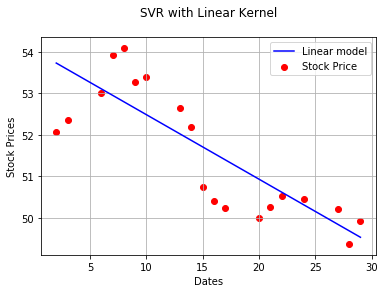

49.3750010002
Stock price with Linear kernel is  49.3750010002

Predicting the stock price :
49.3750010002
COP.csv


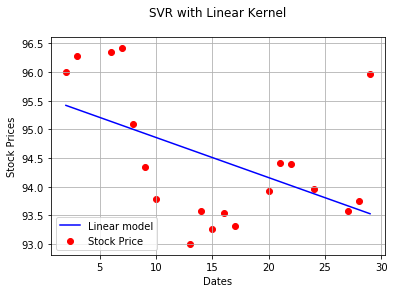

93.4600003157
Stock price with Linear kernel is  93.4600003157

Predicting the stock price :
93.4600003157
AXP.csv


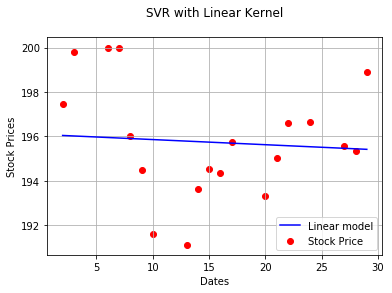

195.390524
Stock price with Linear kernel is  195.390524

Predicting the stock price :
195.390524
NFLX.csv


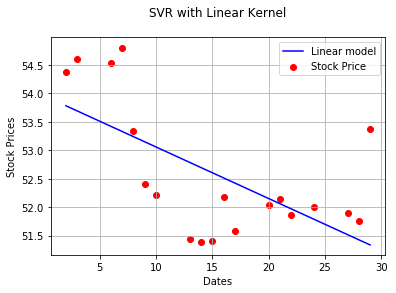

51.2442841429
Stock price with Linear kernel is  51.2442841429

Predicting the stock price :
51.2442841429
USB.csv


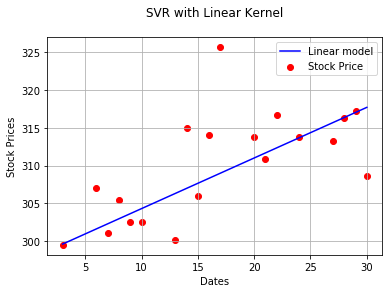

317.715725857
Stock price with Linear kernel is  317.715725857

Predicting the stock price :
317.715725857
TSLA.csv


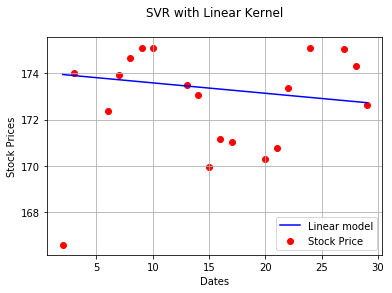

172.685005192
Stock price with Linear kernel is  172.685005192

Predicting the stock price :
172.685005192
AAPL.csv


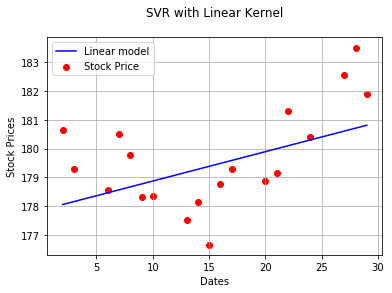

180.913326
Stock price with Linear kernel is  180.913326

Predicting the stock price :
180.913326
FB.csv


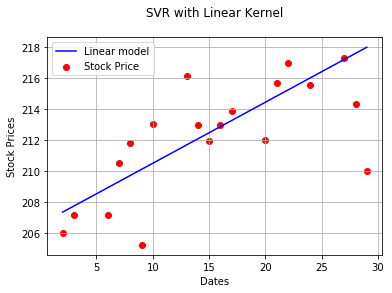

218.390907637
Stock price with Linear kernel is  218.390907637

Predicting the stock price :
218.390907637
NVDA.csv


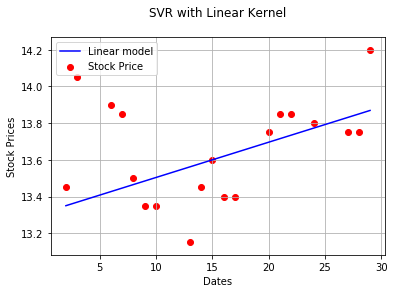

13.8884615383
Stock price with Linear kernel is  13.8884615383

Predicting the stock price :
13.8884615383
DFRG.csv


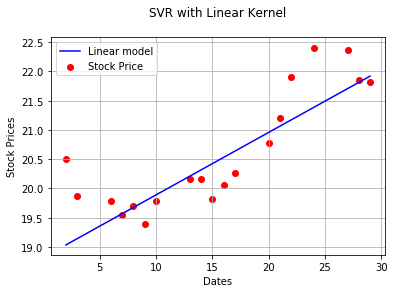

22.0268420527
Stock price with Linear kernel is  22.0268420527

Predicting the stock price :
22.0268420527
TWTR.csv


In [6]:
count1 = 0
for key in dic_name:
    count1 = count1 + 1
    Stock_P(dic_name[key], "Linear", 30)
    #del dates,prices
    print dic_name[key]
    #Taking ten stock prices
    if count1 == 10:
        break

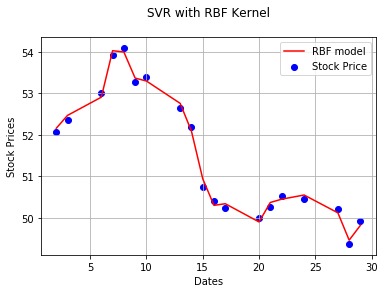

Stock price with RBF kernel is  51.0284613311

Predicting the stock price :
51.0284613311
COP.csv


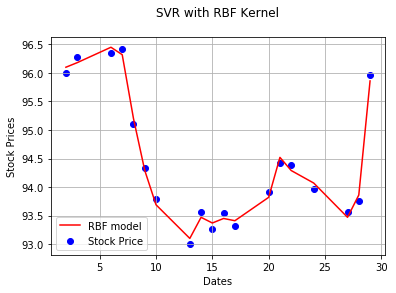

Stock price with RBF kernel is  98.2915231465

Predicting the stock price :
98.2915231465
AXP.csv


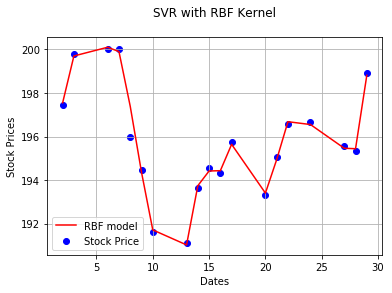

Stock price with RBF kernel is  203.576909937

Predicting the stock price :
203.576909937
NFLX.csv


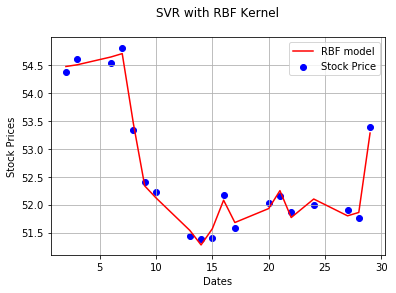

Stock price with RBF kernel is  55.2880206017

Predicting the stock price :
55.2880206017
USB.csv


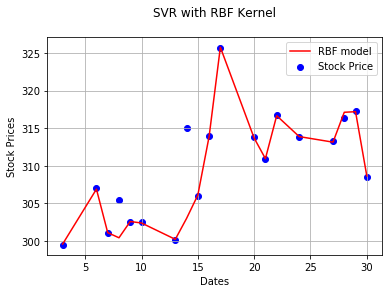

Stock price with RBF kernel is  308.660103793

Predicting the stock price :
308.660103793
TSLA.csv


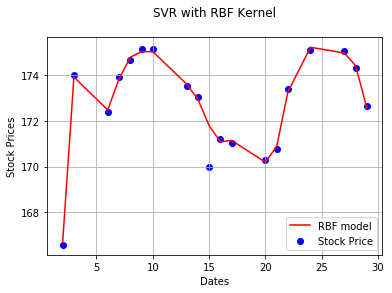

Stock price with RBF kernel is  170.741882287

Predicting the stock price :
170.741882287
AAPL.csv


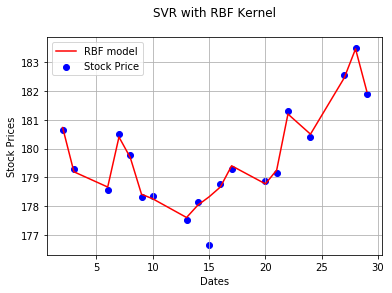

Stock price with RBF kernel is  179.640889721

Predicting the stock price :
179.640889721
FB.csv


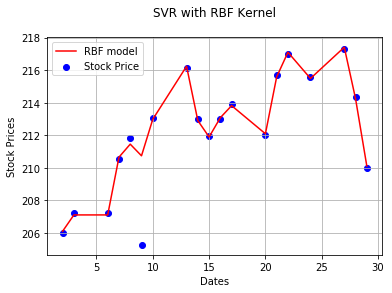

Stock price with RBF kernel is  207.0066745

Predicting the stock price :
207.0066745
NVDA.csv


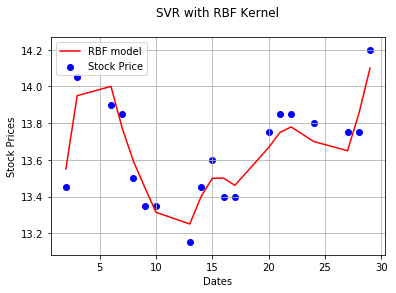

Stock price with RBF kernel is  14.2525017253

Predicting the stock price :
14.2525017253
DFRG.csv


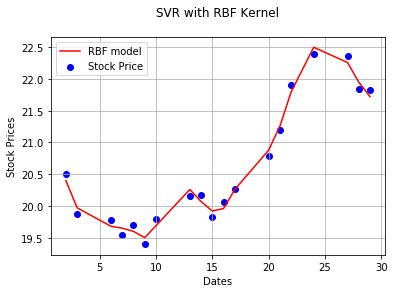

Stock price with RBF kernel is  21.6002645562

Predicting the stock price :
21.6002645562
TWTR.csv


In [7]:
count1 = 0
for key in dic_name:
    count1 = count1 + 1
    Stock_P(dic_name[key], "RBF", 30)
    #del dates,prices
    print dic_name[key]
    #Taking ten stock prices
    if count1 == 10:
        break



In [8]:
final_recommend_linear = sorted(stocks_recommend_linear.items(), key=lambda x:x[1])
final_recommend_RBF = sorted(stocks_recommend_RBF.items(), key=lambda x:x[1])

In [9]:
#Printing the safe stocks for the ivestment based on their percent increase as per algorithms
print "For linear kernel, the top 5 recommendation is"
for i in range (1,6):
    print final_recommend_linear[-i]
print "\n\nFor RBF kernel, the top 5 recommendation is"
for i in range (1,6):
    print final_recommend_RBF[-i]   
    
print "\n\nNote the changes in the percentange"

For linear kernel, the top 5 recommendation is
('NVDA.csv', 3.990720839995948)
('TSLA.csv', 2.9672439449389336)
('TWTR.csv', 0.9479470792025626)
('AAPL.csv', 0.031860158033508834)
('FB.csv', -0.5369580545107355)


For RBF kernel, the top 5 recommendation is
('USB.csv', 3.5744090782199396)
('AXP.csv', 2.429683379322546)
('NFLX.csv', 2.34623992904778)
('COP.csv', 2.220479518269439)
('DFRG.csv', 0.3697304596908074)


Note the changes in the percentange
